<a href="https://colab.research.google.com/github/Linkabli/dap-2024/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4. Линейная регрессия

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les06
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

1. Выведете описание набора данных и наименование признаков.

In [4]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [5]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target
print("ервые 5 строк набора данных:\n")
print(data.head(5))

ервые 5 строк набора данных:

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [6]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target
print("Типы данных:\n")
print(data.dtypes)
print("\nКатегориальные признаки отсутствуют, так как все значения числовые.")
print("\nПроверка на null-значения:\n")
print(data.isnull().sum())

Типы данных:

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Категориальные признаки отсутствуют, так как все значения числовые.

Проверка на null-значения:

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


## Исследование данных

4. Постройте матрицу корреляции.

In [7]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target
correlation_matrix = data.corr()
print("Матрица корреляции:\n")
print(correlation_matrix)

Матрица корреляции:

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4  

5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.

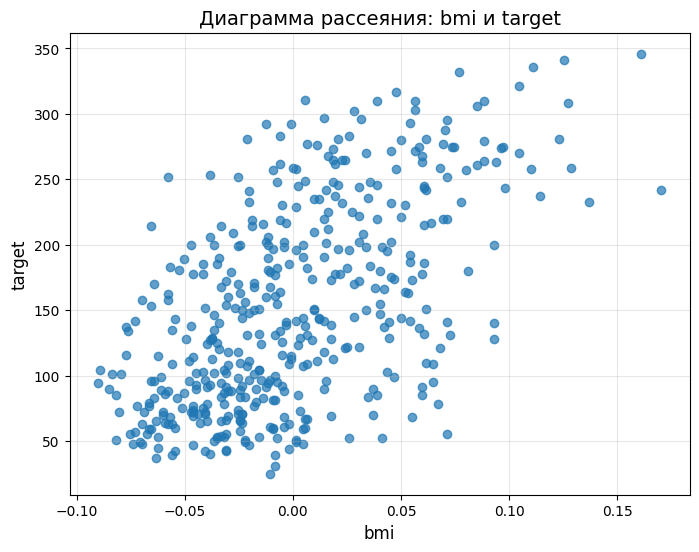

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target
correlation_matrix = data.corr()
max_corr_feature = correlation_matrix['target'].drop('target').idxmax()
plt.figure(figsize=(8, 6))
plt.scatter(data[max_corr_feature], data['target'], alpha=0.7)
plt.title(f"Диаграмма рассеяния: {max_corr_feature} и target", fontsize=14)
plt.xlabel(max_corr_feature, fontsize=12)
plt.ylabel('target', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [9]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target
correlation_matrix = data.corr()
top_features = correlation_matrix['target'].drop('target').abs().sort_values(ascending=False).head(5).index
X = data[top_features]
y = data['target']
print("5 признаков с наивысшей корреляцией с целевым значением:\n", top_features.tolist())
print("\nПример первых 5 строк X:\n", X.head())
print("\nПример первых 5 строк y:\n", y.head())


5 признаков с наивысшей корреляцией с целевым значением:
 ['bmi', 's5', 'bp', 's4', 's3']

Пример первых 5 строк X:
         bmi        s5        bp        s4        s3
0  0.061696  0.019907  0.021872 -0.002592 -0.043401
1 -0.051474 -0.068332 -0.026328 -0.039493  0.074412
2  0.044451  0.002861 -0.005670 -0.002592 -0.032356
3 -0.011595  0.022688 -0.036656  0.034309 -0.036038
4 -0.036385 -0.031988  0.021872 -0.002592  0.008142

Пример первых 5 строк y:
 0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Размер обучающего набора (X_train, y_train):", X_train.shape, y_train.shape)
print("Размер тестового набора (X_test, y_test):", X_test.shape, y_test.shape)

Размер обучающего набора (X_train, y_train): (331, 5) (331,)
Размер тестового набора (X_test, y_test): (111, 5) (111,)


8. Выполните обучение модели.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Среднеквадратичная ошибка (RMSE): {rmse}")

Среднеквадратичная ошибка (RMSE): 53.784557443405994


10. Расчитайте R² (коэффициент детерминации)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка (RMSE): {rmse}")
print(f"Коэффициент детерминации (R²): {r2}")

Среднеквадратичная ошибка (RMSE): 53.784557443405994
Коэффициент детерминации (R²): 0.4768642138880054


## Вопросы для защиты

1. Какие типы машинного обучения вы знаете?

Типы машинного обучения:
* Обучение с учителем (Supervised Learning): Используются размеченные данные (с входами и соответствующими выходами).
* Обучение без учителя (Unsupervised Learning): Работа с неразмеченными данными для выявления скрытых закономерностей (кластеризация, понижение размерности).
* Обучение с подкреплением (Reinforcement Learning): Обучение через взаимодействие с окружающей средой на основе вознаграждения и штрафов.
* Полуобучение (Semi-Supervised Learning): Комбинируются размеченные и неразмеченные данные.
* Обучение на основе переноса (Transfer Learning): Использование знаний из одной задачи для другой, похожей задачи.

2. Чем отличается обучение с учителем и без учителя?

Различия между обучением с учителем и без учителя:
* Обучение с учителем: Данные размечены, модель предсказывает определенный выход (классификация, регрессия).
* Обучение без учителя: Данные неразмечены, модель ищет скрытые структуры (кластеризация, PCA).

3. Чем пакетное обучение отличается от динамического?

Пакетное обучение: Модель обучается на всех данных сразу. Требует полной доступности данных. Динамическое (онлайн) обучение: Данные поступают по одному или небольшими порциями, модель адаптируется постепенно.

4. Чем обучение на основе образцов отличается от обучения на основе модели?

Обучение на основе образцов: Модель запоминает примеры из данных и делает предсказания, сравнивая с ними (например, kNN). Обучение на основе модели: Модель строит обобщенные зависимости между входами и выходами, используя параметры (например, линейная регрессия).

5. Что такое линейная регрессия?

Метод предсказания числового значения на основе линейной зависимости между переменными.

6. Что такое градиентный спуск?

Оптимизационный алгоритм, который минимизирует функцию ошибки путем итеративного обновления параметров модели по направлению антиградиента.

7. Как правильно обрабатывать категориальные признаки?

Обработка категориальных признаков:
* Преобразование категорий в числа.
* Создание бинарных признаков для каждой категории.
* Используется, если категории имеют порядок.
* Заменяет категории на среднее значение целевой переменной.

8. Что такое матрица корреляции?

Матрица, показывающая степень линейной зависимости между числовыми переменными.
Коэффициенты корреляции варьируются от -1 до 1.

9. Что показывает метрика RMSE?

Корень среднеквадратичной ошибки. Измеряет разницу между предсказанными и истинными значениями.

10. Что показывает метрика R²?

Показывает долю объясненной моделью дисперсии в данных.